In [59]:
! pip install nltk

You should consider upgrading via the 'C:\Users\asus\PycharmProjects\NLP_text_classification\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter


In [61]:
file_path1 = 'test.csv'  # Replace with the actual path to your CSV file
df1 = pd.read_csv(file_path1)

# training file 
file_path2 = 'train.csv'  # Replace with the actual path to your CSV file
df2 = pd.read_csv(file_path2)


In [62]:
df1

,2,Great CD,"My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing ""Who was that singing ?"""
0,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
1,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
2,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
3,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
4,1,DVD Player crapped out after one year,I also began having the incorrect disc problem...
...,...,...,...
399994,1,Unbelievable- In a Bad Way,We bought this Thomas for our son who is a hug...
399995,1,"Almost Great, Until it Broke...",My son recieved this as a birthday gift 2 mont...
399996,1,Disappointed !!!,"I bought this toy for my son who loves the ""Th..."
399997,2,Classic Jessica Mitford,This is a compilation of a wide range of Mitfo...


In [63]:
df2

,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...
...,...,...,...
3599994,1,Don't do it!!,The high chair looks great when it first comes...
3599995,1,"Looks nice, low functionality",I have used this highchair for 2 kids now and ...
3599996,1,"compact, but hard to clean","We have a small house, and really wanted two o..."
3599997,1,what is it saying?,not sure what this book is supposed to be. It ...


# checking the columns:- 

In [64]:
df1.columns

Index(['2', 'Great CD',
       'My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"'],
      dtype='object')

In [65]:
df2.columns

Index(['2', 'Stuning even for the non-gamer',
       'This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'],
      dtype='object')

# there is no column name so we assignb the column name  to both the files

In [66]:
# Provide a list of column names
column_names = ['polarity','title','text']

df1 = pd.read_csv(file_path1, header=None, names=column_names)

# Now, df contains your data with the assigned column names
df2 = pd.read_csv(file_path2, header=None, names=column_names)



# changed the both column names 

In [67]:
df1.columns

Index(['polarity', 'title', 'text'], dtype='object')

In [68]:
df2.columns

Index(['polarity', 'title', 'text'], dtype='object')

# make a copy dataframe for both the files 

In [69]:
df_copy_test = df1.copy()
df_copy_train = df2.copy()

In [70]:
df_copy_test

,polarity,title,text
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
...,...,...,...
399995,1,Unbelievable- In a Bad Way,We bought this Thomas for our son who is a hug...
399996,1,"Almost Great, Until it Broke...",My son recieved this as a birthday gift 2 mont...
399997,1,Disappointed !!!,"I bought this toy for my son who loves the ""Th..."
399998,2,Classic Jessica Mitford,This is a compilation of a wide range of Mitfo...


In [71]:
first_row = df_copy_test.iloc[0]


In [72]:
first_row

polarity                                                    2
title                                                Great CD
text        My lovely Pat has one of the GREAT voices of h...
Name: 0, dtype: object

# check the value count of ploarity column in the test file 

In [73]:
unique_values_test= df_copy_test['polarity'].value_counts()

In [74]:
unique_values_test

polarity
2    200000
1    200000
Name: count, dtype: int64

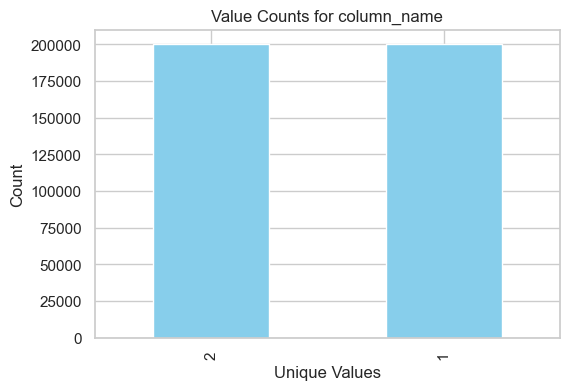

In [75]:
plt.figure(figsize=(6,4))
unique_values_test.plot(kind='bar', color='skyblue')
plt.title('Value Counts for column_name')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.show()


# data ditribution of polarity 

# check the value count of ploarity column in the train file 

In [76]:
unique_values_train= df_copy_train['polarity'].value_counts()
unique_values_train

polarity
2    1800000
1    1800000
Name: count, dtype: int64

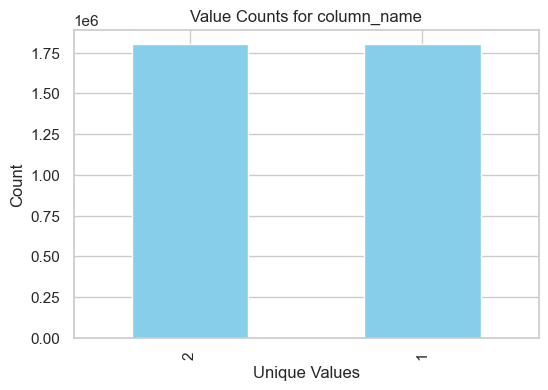

In [77]:
plt.figure(figsize=(6, 4))
unique_values_train.plot(kind='bar', color='skyblue')
plt.title('Value Counts for column_name')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.show()


# making a sampled dataframe 

In [78]:
df_copy_test = df_copy_test.sample(n=20000, random_state=42) 

#  look the column title  and print the special  character in the text " in the test file "

In [79]:
column_name = 'title'

text_column = df_copy_test[column_name]


In [80]:
df_copy_test

,polarity,title,text
23218,2,This is a great book,I must preface this by saying that I am not re...
20731,1,Huge Disappointment.,"As a big time, long term Trevanian fan, I was ..."
39555,2,Wayne is tight but cant hang with Turk.,This album is hot as it wants to be. However C...
147506,2,Excellent,I read this book when I was in elementary scho...
314215,1,Not about Anusara,Although this book is touted on several Anusar...
...,...,...,...
102238,1,Worthless,Bought this for the same reason everyone else ...
49048,2,The wheel keeps on turning,"As summer moves into fall, fall into winter, w..."
90371,1,Fellowes Shredder,Arrived - absolutely did not work or turn on a...
185609,2,Star Trek Love,I got this DVD set for my boyfriend and he lov...


In [81]:
df_copy_train= df_copy_train.sample(n=40000, random_state=42) 

In [82]:
df_copy_train

,polarity,title,text
2079998,1,Expensive Junk,This product consists of a piece of thin flexi...
1443106,1,Toast too dark,"Even on the lowest setting, the toast is too d..."
3463669,2,Excellent imagery...dumbed down story,I enjoyed this disc. The video is stunning. I ...
2914699,1,Are we pretending everyone is married?,The authors pretend that parents neither die n...
1603231,1,Not worth your time,"Might as well just use a knife, this product h..."
...,...,...,...
1102402,2,Read these years ago,"I read this series years ago, and I am buying ..."
2270490,2,100% Signal Strength Throughout My Condo,My Condo is about 900 square feet. My wife lik...
1281339,2,Informative,A great read for people interested int he hist...
622766,1,Wasn't that great,I was tracking this product hardcore and on th...


In [83]:
def count_special_characters(text):
    if pd.isna(text):
        return {"NaN": 1}
    special_characters = set("!@#$%^&*()_+[]{}""-|;':,.<>?/~`")
    counts = {char: text.count(char) for char in text if char in special_characters}
    return counts

# Count and print the value counts for each special character, including NaN
special_character_counts = text_column.apply(count_special_characters)

# Combine the dictionaries from all rows
combined_counts = {}
for counts in special_character_counts:
    for char, count in counts.items():
        if char in combined_counts:
            combined_counts[char] += count
        else:
            combined_counts[char] = count

# Print the combined counts
for char, count in combined_counts.items():
    print(f"{char}: {count}")

.: 6266
,: 1939
!: 5487
:: 176
&: 142
-: 1326
': 1757
?: 730
(: 128
): 125
+: 39
/: 131
$: 60
%: 25
*: 78
;: 60
`: 5
[: 15
]: 14
~: 20
#: 25
>: 1
@: 14
_: 2
NaN: 1


C:\Users\asus\AppData\Local\Temp\ipykernel_7432\3348304913.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Special Character', y='Count', data=counts_df, palette="viridis")
C:\Users\asus\AppData\Local\Temp\ipykernel_7432\3348304913.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')


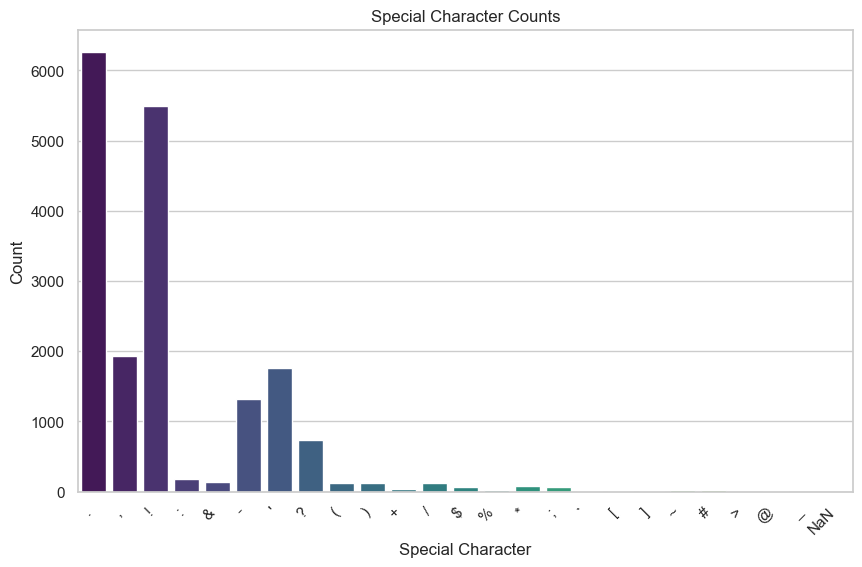

In [84]:
counts_df = pd.DataFrame(list(combined_counts.items()), columns=['Special Character', 'Count'])

# Plot the counts using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Special Character', y='Count', data=counts_df, palette="viridis")
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Special Character Counts')
plt.show()

# remove the special character and the nan values rows 

In [85]:
df_copy_test = df_copy_test.dropna(subset=[column_name])

# Function to remove special characters from a given text
def remove_special_characters(text):
    if pd.isna(text):
        return text
    special_characters = set("-")
    return ''.join(char for char in text if char not in special_characters)

# Remove special characters from the specified column
df_copy_test[column_name] = df_copy_test[column_name].apply(remove_special_characters)


C:\Users\asus\AppData\Local\Temp\ipykernel_7432\531764759.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_test[column_name] = df_copy_test[column_name].apply(remove_special_characters)


In [86]:
df_copy_test

,polarity,title,text
23218,2,This is a great book,I must preface this by saying that I am not re...
20731,1,Huge Disappointment.,"As a big time, long term Trevanian fan, I was ..."
39555,2,Wayne is tight but cant hang with Turk.,This album is hot as it wants to be. However C...
147506,2,Excellent,I read this book when I was in elementary scho...
314215,1,Not about Anusara,Although this book is touted on several Anusar...
...,...,...,...
102238,1,Worthless,Bought this for the same reason everyone else ...
49048,2,The wheel keeps on turning,"As summer moves into fall, fall into winter, w..."
90371,1,Fellowes Shredder,Arrived - absolutely did not work or turn on a...
185609,2,Star Trek Love,I got this DVD set for my boyfriend and he lov...


# check again the special character are removed or not 

In [87]:
column_name = 'title'

text_column = df_copy_test[column_name]

In [88]:
your_column = df_copy_test['title']

# Define the set of special characters
special_characters = set("!@#$%^&*()_+[]{}-|;'-"":,.<>?/~`")

# Check if any element in the column contains special characters
contains_special_characters = any(any(char in special_characters for char in str(value)) for value in your_column)

if contains_special_characters:
    print("Column contains special characters.")
else:
    print("Column does not contain special characters.")

Column contains special characters.


In [89]:
df_copy_test

,polarity,title,text
23218,2,This is a great book,I must preface this by saying that I am not re...
20731,1,Huge Disappointment.,"As a big time, long term Trevanian fan, I was ..."
39555,2,Wayne is tight but cant hang with Turk.,This album is hot as it wants to be. However C...
147506,2,Excellent,I read this book when I was in elementary scho...
314215,1,Not about Anusara,Although this book is touted on several Anusar...
...,...,...,...
102238,1,Worthless,Bought this for the same reason everyone else ...
49048,2,The wheel keeps on turning,"As summer moves into fall, fall into winter, w..."
90371,1,Fellowes Shredder,Arrived - absolutely did not work or turn on a...
185609,2,Star Trek Love,I got this DVD set for my boyfriend and he lov...


# look at the column "text"

In [90]:
column_name = 'text'

text_column = df_copy_test[column_name]


In [91]:
def count_special_characters(text):
    if pd.isna(text):
        return {"NaN": 1}
    special_characters = set("!@#$%^&*()_+""[]{}|;':,.<>?/~`-")
    counts = {char: text.count(char) for char in text if char in special_characters}
    return counts

# Count and print the value counts for each special character, including NaN
special_character_counts = text_column.apply(count_special_characters)

# Combine the dictionaries from all rows
combined_counts = {}
for counts in special_character_counts:
    for char, count in counts.items():
        if char in combined_counts:
            combined_counts[char] += count
        else:
            combined_counts[char] = count

# Print the combined counts
for char, count in combined_counts.items():
    print(f"{char}: {count}")

-: 12268
.: 105181
,: 54473
/: 2018
(: 5138
): 5360
!: 12889
': 28884
?: 2793
$: 1003
:: 1806
*: 683
&: 960
[: 154
]: 156
+: 285
;: 1093
`: 85
#: 235
<: 18
@: 48
>: 57
%: 211
~: 83
_: 99
{: 14
}: 12
^: 16
|: 1


C:\Users\asus\AppData\Local\Temp\ipykernel_7432\3348304913.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Special Character', y='Count', data=counts_df, palette="viridis")
C:\Users\asus\AppData\Local\Temp\ipykernel_7432\3348304913.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')


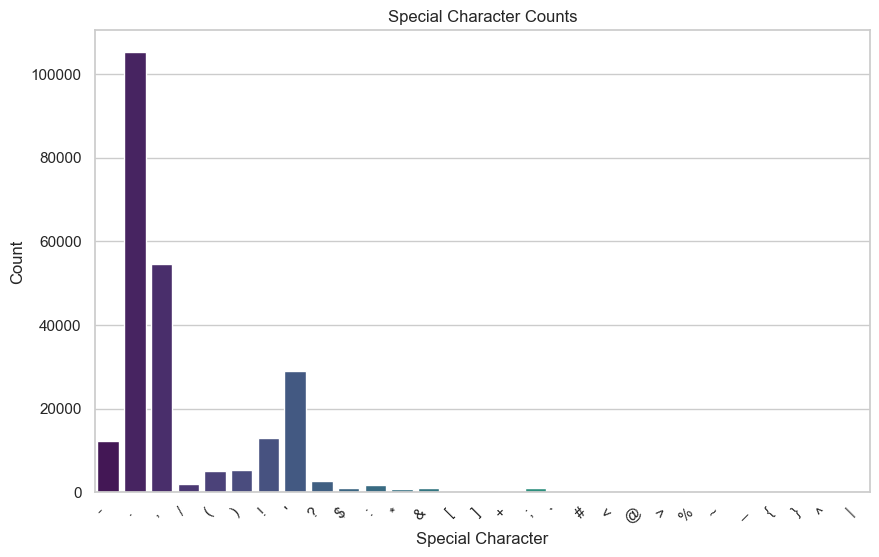

In [92]:
counts_df = pd.DataFrame(list(combined_counts.items()), columns=['Special Character', 'Count'])

# Plot the counts using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Special Character', y='Count', data=counts_df, palette="viridis")
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Special Character Counts')
plt.show()

# remove the special  character in the file "test file "

In [93]:
df_copy_test = df_copy_test.dropna(subset=[column_name])

# Function to remove special characters from a given text
def remove_special_characters(text):
    if pd.isna(text):
        return text
    special_characters = set("!@#$%^&*()_+[]{}|;':,.<>?/~`")
    return ''.join(char for char in text if char not in special_characters)

# Remove special characters from the specified column
df_copy_test[column_name] = df_copy_test[column_name].apply(remove_special_characters)


In [94]:
df_copy_test

,polarity,title,text
23218,2,This is a great book,I must preface this by saying that I am not re...
20731,1,Huge Disappointment.,As a big time long term Trevanian fan I was ex...
39555,2,Wayne is tight but cant hang with Turk.,This album is hot as it wants to be However Ca...
147506,2,Excellent,I read this book when I was in elementary scho...
314215,1,Not about Anusara,Although this book is touted on several Anusar...
...,...,...,...
102238,1,Worthless,Bought this for the same reason everyone else ...
49048,2,The wheel keeps on turning,As summer moves into fall fall into winter win...
90371,1,Fellowes Shredder,Arrived - absolutely did not work or turn on a...
185609,2,Star Trek Love,I got this DVD set for my boyfriend and he lov...


# check the column text has special character  or not 

In [95]:
your_column = df_copy_test['title']

# Define the set of special characters
special_characters = set("!@#$%^&*()_+[]{}-|;'-"":,.<>?/~`")

# Check if any element in the column contains special characters
contains_special_characters = any(any(char in special_characters for char in str(value)) for value in your_column)

if contains_special_characters:
    print("Column contains special characters.")
else:
    print("Column does not contain special characters.")

Column contains special characters.


# remove the numerical inforamtion from the column 

In [96]:
column_names = ['title', 'text',]


In [97]:
def remove_numerical(value):
    if pd.notna(value) and (isinstance(value, str) or isinstance(value, bytes)):
        return re.sub(r'\d+', '', str(value))
    return value

In [98]:
for column_name in column_names:
    df_copy_test[column_name] = df_copy_test[column_name].apply(remove_numerical)


In [99]:
df_copy_test

,polarity,title,text
23218,2,This is a great book,I must preface this by saying that I am not re...
20731,1,Huge Disappointment.,As a big time long term Trevanian fan I was ex...
39555,2,Wayne is tight but cant hang with Turk.,This album is hot as it wants to be However Ca...
147506,2,Excellent,I read this book when I was in elementary scho...
314215,1,Not about Anusara,Although this book is touted on several Anusar...
...,...,...,...
102238,1,Worthless,Bought this for the same reason everyone else ...
49048,2,The wheel keeps on turning,As summer moves into fall fall into winter win...
90371,1,Fellowes Shredder,Arrived - absolutely did not work or turn on a...
185609,2,Star Trek Love,I got this DVD set for my boyfriend and he lov...


# convert all the data into lower case 

In [100]:
df_copy_test[column_names] = df_copy_test[column_names].apply(lambda x: x.astype(str).str.lower())


In [101]:
df_copy_test

,polarity,title,text
23218,2,this is a great book,i must preface this by saying that i am not re...
20731,1,huge disappointment.,as a big time long term trevanian fan i was ex...
39555,2,wayne is tight but cant hang with turk.,this album is hot as it wants to be however ca...
147506,2,excellent,i read this book when i was in elementary scho...
314215,1,not about anusara,although this book is touted on several anusar...
...,...,...,...
102238,1,worthless,bought this for the same reason everyone else ...
49048,2,the wheel keeps on turning,as summer moves into fall fall into winter win...
90371,1,fellowes shredder,arrived - absolutely did not work or turn on a...
185609,2,star trek love,i got this dvd set for my boyfriend and he lov...


# analyze the train file

In [102]:
column_name = 'title'
text_column = df_copy_train[column_name]


# looking the special character in the title column 

In [103]:
def count_special_characters(text):
    if pd.isna(text):
        return {"NaN": 1}
    special_characters = set("!@#$%^&*()_+[]{}""|;':,.<>?/-''~`")
    counts = {char: text.count(char) for char in text if char in special_characters}
    return counts

# Count and print the value counts for each special character, including NaN
special_character_counts = text_column.apply(count_special_characters)

# Combine the dictionaries from all rows
combined_counts = {}
for counts in special_character_counts:
    for char, count in counts.items():
        if char in combined_counts:
            combined_counts[char] += count
        else:
            combined_counts[char] = count

# Print the combined counts
for char, count in combined_counts.items():
    print(f"{char}: {count}")

.: 11995
?: 1700
&: 281
,: 3928
-: 2558
': 3557
!: 10939
:: 402
;: 113
(: 278
/: 291
): 276
*: 127
[: 42
]: 40
$: 120
+: 79
#: 47
~: 24
@: 21
`: 18
%: 28
_: 11
>: 12
^: 8
<: 9
NaN: 2
{: 1
}: 1
|: 1


C:\Users\asus\AppData\Local\Temp\ipykernel_7432\3348304913.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Special Character', y='Count', data=counts_df, palette="viridis")
C:\Users\asus\AppData\Local\Temp\ipykernel_7432\3348304913.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')


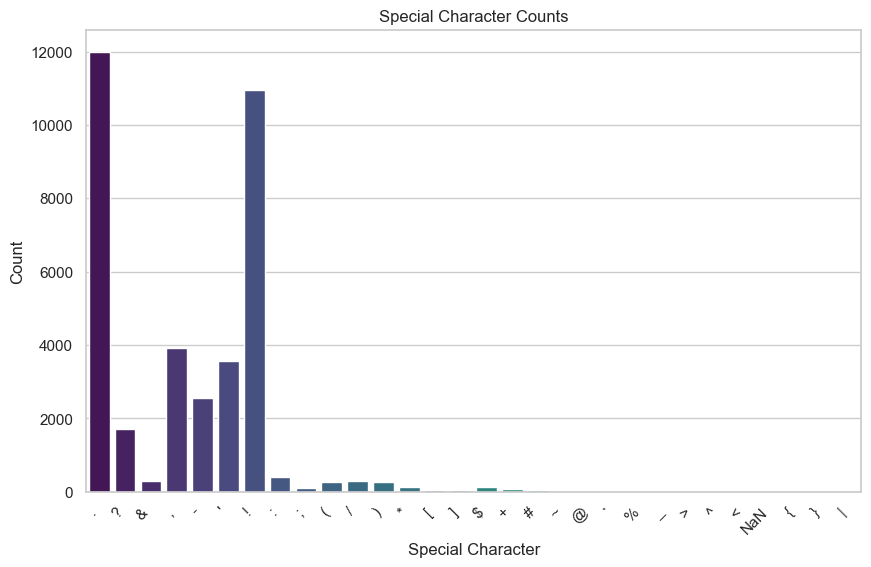

In [104]:
counts_df = pd.DataFrame(list(combined_counts.items()), columns=['Special Character', 'Count'])

# Plot the counts using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Special Character', y='Count', data=counts_df, palette="viridis")
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Special Character Counts')
plt.show()

# removing all the special characterin the file 

In [105]:
df_copy_train = df_copy_train.dropna(subset=[column_name])

# Function to remove special characters from a given text
def remove_special_characters(text):
    if pd.isna(text):
        return text
    special_characters = set("!@#$%^&*()_+[]{}-|;'-"":,.<>?/~`")
    return ''.join(char for char in text if char not in special_characters)

# Remove special characters from the specified column
df_copy_train[column_name] = df_copy_train[column_name].apply(remove_special_characters)


C:\Users\asus\AppData\Local\Temp\ipykernel_7432\3517419414.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_train[column_name] = df_copy_train[column_name].apply(remove_special_characters)


In [106]:
df_copy_train

,polarity,title,text
2079998,1,Expensive Junk,This product consists of a piece of thin flexi...
1443106,1,Toast too dark,"Even on the lowest setting, the toast is too d..."
3463669,2,Excellent imagerydumbed down story,I enjoyed this disc. The video is stunning. I ...
2914699,1,Are we pretending everyone is married,The authors pretend that parents neither die n...
1603231,1,Not worth your time,"Might as well just use a knife, this product h..."
...,...,...,...
1102402,2,Read these years ago,"I read this series years ago, and I am buying ..."
2270490,2,100 Signal Strength Throughout My Condo,My Condo is about 900 square feet. My wife lik...
1281339,2,Informative,A great read for people interested int he hist...
622766,1,Wasnt that great,I was tracking this product hardcore and on th...


# check the file special character are  removed or not  

In [107]:
your_column = df_copy_train['title']

# Define the set of special characters
special_characters = set("!@#$%^&*()_+[]{}-|;'-"":,.<>?/~`")

# Check if any element in the column contains special characters
contains_special_characters = any(any(char in special_characters for char in str(value)) for value in your_column)

if contains_special_characters:
    print("Column contains special characters.")
else:
    print("Column does not contain special characters.")

Column does not contain special characters.


# check the train file has  special charcater in  the  text column 

In [108]:
column_name = 'text'
text_column = df_copy_train[column_name]


In [109]:
def count_special_characters(text):
    if pd.isna(text):
        return {"NaN": 1}
    special_characters = set("!@#$%^&*()_+""[]{}|;':,.<>?/~`-")
    counts = {char: text.count(char) for char in text if char in special_characters}
    return counts

# Count and print the value counts for each special character, including NaN
special_character_counts = text_column.apply(count_special_characters)

# Combine the dictionaries from all rows
combined_counts = {}
for counts in special_character_counts:
    for char, count in counts.items():
        if char in combined_counts:
            combined_counts[char] += count
        else:
            combined_counts[char] = count

# Print the combined counts
for char, count in combined_counts.items():
    print(f"{char}: {count}")

,: 110234
.: 211139
:: 3683
-: 24756
(: 10290
): 10700
': 58033
!: 25304
$: 2028
/: 3899
?: 5733
&: 1930
;: 2222
@: 102
~: 120
[: 421
]: 417
#: 259
%: 490
`: 155
+: 495
*: 941
_: 203
<: 64
>: 116
^: 31
{: 9
}: 12
|: 6


C:\Users\asus\AppData\Local\Temp\ipykernel_7432\3348304913.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Special Character', y='Count', data=counts_df, palette="viridis")
C:\Users\asus\AppData\Local\Temp\ipykernel_7432\3348304913.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')


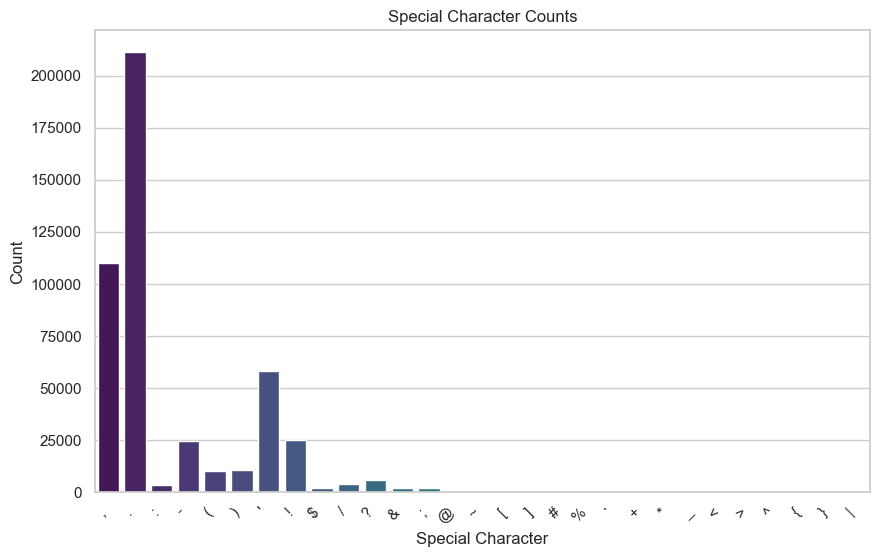

In [110]:
counts_df = pd.DataFrame(list(combined_counts.items()), columns=['Special Character', 'Count'])

# Plot the counts using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Special Character', y='Count', data=counts_df, palette="viridis")
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Special Character Counts')
plt.show()

# remove the special character form the column

In [111]:
df_copy_train = df_copy_train.dropna(subset=[column_name])

# Function to remove special characters from a given text
def remove_special_characters(text):
    if pd.isna(text):
        return text
    special_characters = set("!@#$%^&*()_+[]{}-|;'-"":,.<>?/~`")
    return ''.join(char for char in text if char not in special_characters)

# Remove special characters from the specified column
df_copy_train[column_name] = df_copy_train[column_name].apply(remove_special_characters)


# check the column textt has spcial character or not 

In [112]:
your_column = df_copy_train['text']

special_characters = set("!@#$%^&*()_+[]{}-|;'-"":,.<>?/~`")

# Check if any element in the column contains special characters
contains_special_characters = any(any(char in special_characters for char in str(value)) for value in your_column)

if contains_special_characters:
    print("Column contains special characters.")
else:
    print("Column does not contain special characters.")

Column does not contain special characters.


# remove the  numerical information from the data 

In [113]:
column_names = ['title', 'text',]

In [114]:
def remove_numerical(value):
    if pd.notna(value) and (isinstance(value, str) or isinstance(value, bytes)):
        return re.sub(r'\d+', '', str(value))
    return value


In [115]:
for column_name in column_names:
    df_copy_train[column_name] = df_copy_train[column_name].apply(remove_numerical)


In [116]:
df_copy_train

,polarity,title,text
2079998,1,Expensive Junk,This product consists of a piece of thin flexi...
1443106,1,Toast too dark,Even on the lowest setting the toast is too da...
3463669,2,Excellent imagerydumbed down story,I enjoyed this disc The video is stunning I ag...
2914699,1,Are we pretending everyone is married,The authors pretend that parents neither die n...
1603231,1,Not worth your time,Might as well just use a knife this product ho...
...,...,...,...
1102402,2,Read these years ago,I read this series years ago and I am buying t...
2270490,2,Signal Strength Throughout My Condo,My Condo is about square feet My wife likes t...
1281339,2,Informative,A great read for people interested int he hist...
622766,1,Wasnt that great,I was tracking this product hardcore and on th...


# convert allthe data into lower case 

In [117]:
df_copy_train[column_names] = df_copy_train[column_names].apply(lambda x: x.astype(str).str.lower())


In [118]:
df_copy_train

,polarity,title,text
2079998,1,expensive junk,this product consists of a piece of thin flexi...
1443106,1,toast too dark,even on the lowest setting the toast is too da...
3463669,2,excellent imagerydumbed down story,i enjoyed this disc the video is stunning i ag...
2914699,1,are we pretending everyone is married,the authors pretend that parents neither die n...
1603231,1,not worth your time,might as well just use a knife this product ho...
...,...,...,...
1102402,2,read these years ago,i read this series years ago and i am buying t...
2270490,2,signal strength throughout my condo,my condo is about square feet my wife likes t...
1281339,2,informative,a great read for people interested int he hist...
622766,1,wasnt that great,i was tracking this product hardcore and on th...



# check both the files has any null or nan rows or not 

# check the test file 

In [119]:

column_names = ['title', 'polarity', 'text']

# Check if there are any null or NaN values in the specified columns
has_null_values = df_copy_test[column_names].isnull().any()

# Display columns with null or NaN values
columns_with_null = has_null_values[has_null_values].index.tolist()

if columns_with_null:
    print(f"Columns {columns_with_null} contain null or NaN values.")
else:
    print("No columns contain null or NaN values.")


No columns contain null or NaN values.


# check the train file 

In [120]:

column_names = ['title', 'polarity', 'text']

# Check if there are any null or NaN values in the specified columns
has_null_values = df_copy_train[column_names].isnull().any()

# Display columns with null or NaN values
columns_with_null = has_null_values[has_null_values].index.tolist()

if columns_with_null:
    print(f"Columns {columns_with_null} contain null or NaN values.")
else:
    print("No columns contain null or NaN values.")


No columns contain null or NaN values.


# dealing with the stop word in both of file 

# analyze the stop words in the test file 

In [121]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# remove the  stopwordd in the title column in test file 


In [122]:
column_names = df_copy_test['title']

# the stopword in english 

In [123]:
stop_words = set(stopwords.words('english'))
stop_words


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [124]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [125]:
column_names

23218                                  this is a great book
20731                                  huge disappointment.
39555               wayne is tight but cant hang with turk.
147506                                            excellent
314215                                    not about anusara
                                ...                        
102238                                            worthless
49048                            the wheel keeps on turning
90371                                     fellowes shredder
185609                                       star trek love
385652    overpriced junk  beware of high grade counterf...
Name: title, Length: 19999, dtype: object

# remove the stop words in the dataframe 

In [126]:
words = nltk.word_tokenize(" ".join(column_names))

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() in stop_words]

# Count the occurrences of each stop word
stop_word_counts = Counter(filtered_words)

# Print stop words and their count
print("Stop Words in the Column and Their Counts:")
for word, count in stop_word_counts.items():
    print(f"{word}: {count}")


Stop Words in the Column and Their Counts:
this: 1301
is: 991
a: 2434
but: 694
with: 383
not: 1757
about: 147
the: 2704
of: 1453
only: 158
in: 530
on: 401
just: 229
who: 69
it: 1270
to: 1055
down: 65
for: 1312
and: 1144
up: 140
by: 148
any: 54
be: 269
as: 306
was: 278
very: 507
has: 83
are: 187
you: 511
my: 414
do: 554
me: 199
all: 261
such: 8
what: 455
i: 1036
that: 197
an: 282
too: 276
should: 96
we: 58
does: 263
she: 29
same: 61
if: 205
no: 305
now: 47
its: 88
how: 64
he: 30
being: 20
so: 251
than: 175
have: 242
then: 33
there: 99
here: 32
out: 164
had: 66
at: 219
d: 14
your: 293
doing: 8
been: 53
or: 110
will: 90
until: 30
them: 36
they: 93
other: 64
over: 75
more: 163
did: 198
when: 49
these: 73
off: 68
why: 75
before: 52
their: 37
own: 32
his: 61
above: 5
few: 28
through: 25
from: 213
after: 89
can: 104
am: 25
t: 9
some: 90
again: 90
most: 66
while: 28
our: 37
where: 58
her: 38
between: 11
those: 17
were: 24
under: 13
won: 3
o: 7
him: 9
yourself: 14
s: 22
ours: 1
don: 5
itself: 5

In [127]:
df_copy_test['title'] = df_copy_test['title'].apply(
    lambda text: " ".join([word for word in nltk.word_tokenize(str(text)) if word.isalpha() and word.lower() not in stop_words])
)


# Modified DataFrame


In [128]:
df_copy_test

,polarity,title,text
23218,2,great book,i must preface this by saying that i am not re...
20731,1,huge disappointment,as a big time long term trevanian fan i was ex...
39555,2,wayne tight cant hang turk,this album is hot as it wants to be however ca...
147506,2,excellent,i read this book when i was in elementary scho...
314215,1,anusara,although this book is touted on several anusar...
...,...,...,...
102238,1,worthless,bought this for the same reason everyone else ...
49048,2,wheel keeps turning,as summer moves into fall fall into winter win...
90371,1,fellowes shredder,arrived - absolutely did not work or turn on a...
185609,2,star trek love,i got this dvd set for my boyfriend and he lov...


# remove the stop words from the text column in test file 

In [129]:
column_name=df_copy_test['text']

In [130]:
column_name

23218     i must preface this by saying that i am not re...
20731     as a big time long term trevanian fan i was ex...
39555     this album is hot as it wants to be however ca...
147506    i read this book when i was in elementary scho...
314215    although this book is touted on several anusar...
                                ...                        
102238    bought this for the same reason everyone else ...
49048     as summer moves into fall fall into winter win...
90371     arrived - absolutely did not work or turn on a...
185609    i got this dvd set for my boyfriend and he lov...
385652    most of the tasks that can be accomplished by ...
Name: text, Length: 19999, dtype: object

In [131]:
words = nltk.word_tokenize(" ".join(column_name))

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() in stop_words]

# Count the occurrences of each stop word
stop_word_counts = Counter(filtered_words)

# Print stop words and their count
print("Stop Words in the Column and Their Counts:")
for word, count in stop_word_counts.items():
    print(f"{word}: {count}")


Stop Words in the Column and Their Counts:
i: 39629
this: 27516
by: 3608
that: 15405
am: 2144
not: 11470
but: 10596
the: 75533
it: 30336
was: 13022
to: 36912
me: 4024
is: 26536
more: 3907
a: 37223
about: 4334
where: 923
we: 2670
from: 4912
as: 8155
than: 2712
some: 3117
you: 11865
can: 3853
with: 11069
and: 41205
her: 2613
has: 4234
an: 4254
my: 9846
who: 2772
most: 1654
of: 29697
have: 10179
in: 17575
while: 1189
so: 6077
his: 3224
him: 837
before: 1156
its: 5132
if: 5546
had: 3907
under: 337
be: 6913
when: 3713
just: 5050
after: 2508
out: 4424
myself: 452
on: 10684
into: 1764
any: 2105
for: 16181
too: 2159
during: 335
at: 4996
down: 1043
those: 999
whom: 43
will: 3955
until: 508
your: 3239
their: 2115
own: 911
all: 6060
are: 8466
very: 5282
were: 2457
do: 2882
why: 1000
does: 1695
only: 3499
them: 2796
should: 1550
or: 4624
further: 107
over: 1739
she: 2094
ma: 16
they: 5431
there: 3350
up: 3402
these: 2677
did: 1959
he: 3237
doing: 323
having: 596
what: 3691
because: 2513
been: 2269

In [132]:
df_copy_test['text'] = df_copy_test['text'].apply(
    lambda text: " ".join([word for word in nltk.word_tokenize(str(text)) if word.isalpha() and word.lower() not in stop_words])
)


In [133]:
df_copy_test

,polarity,title,text
23218,2,great book,must preface saying religious loved book reall...
20731,1,huge disappointment,big time long term trevanian fan extremely dis...
39555,2,wayne tight cant hang turk,album hot wants however cash moneys best album...
147506,2,excellent,read book elementary probably fourth grade rea...
314215,1,anusara,although book touted several anusara web sites...
...,...,...,...
102238,1,worthless,bought reason everyone else doeswaking deep sl...
49048,2,wheel keeps turning,summer moves fall fall winter winter spring ba...
90371,1,fellowes shredder,arrived absolutely work turn know use already ...
185609,2,star trek love,got dvd set boyfriend loves says movies look c...


# remove the stop words from the train file 

# remove the stopwords from the title column

In [134]:
column_names = df_copy_train['title']

In [135]:
column_names

2079998                           expensive junk
1443106                           toast too dark
3463669       excellent imagerydumbed down story
2914699    are we pretending everyone is married
1603231                      not worth your time
                           ...                  
1102402                     read these years ago
2270490      signal strength throughout my condo
1281339                              informative
622766                          wasnt that great
3094616                    dont waste your money
Name: title, Length: 39998, dtype: object

# print stop words in the column 

In [136]:
words = nltk.word_tokenize(" ".join(column_names))

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() in stop_words]

# Count the occurrences of each stop word
stop_word_counts = Counter(filtered_words)


# Print stop words and their count
print("Stop Words in the Column and Their Counts:")
for word, count in stop_word_counts.items():
    print(f"{word}: {count}")


Stop Words in the Column and Their Counts:
too: 558
down: 152
are: 378
we: 120
is: 1895
not: 3328
your: 616
for: 2824
of: 2903
the: 5536
this: 2487
some: 135
but: 1246
it: 2124
or: 203
all: 563
as: 626
an: 606
s: 92
at: 458
his: 111
very: 1102
its: 499
a: 4822
and: 2348
to: 2124
just: 443
when: 113
i: 1790
was: 468
with: 759
me: 377
out: 300
there: 162
what: 928
my: 830
by: 284
did: 172
up: 271
him: 20
from: 432
no: 635
through: 59
do: 424
under: 32
any: 120
so: 485
who: 136
more: 327
than: 336
again: 163
you: 1027
have: 490
about: 271
then: 84
in: 1090
were: 73
if: 398
will: 187
on: 712
them: 68
after: 186
while: 53
few: 58
that: 373
be: 531
does: 295
should: 190
having: 9
only: 253
doing: 8
why: 162
here: 85
has: 168
these: 167
how: 184
they: 192
where: 104
before: 66
other: 90
off: 139
below: 14
their: 86
same: 100
own: 48
can: 248
those: 60
into: 73
yourself: 30
had: 115
been: 106
she: 49
over: 117
our: 63
don: 11
most: 143
her: 82
d: 29
because: 41
he: 55
until: 34
am: 73
now: 93


In [137]:
df_copy_train['title'] = df_copy_train['title'].apply(
    lambda text: " ".join([word for word in nltk.word_tokenize(str(text)) if word.isalpha() and word.lower() not in stop_words])
)


In [138]:
df_copy_train['title']

2079998                      expensive junk
1443106                          toast dark
3463669       excellent imagerydumbed story
2914699         pretending everyone married
1603231                          worth time
                         ...               
1102402                      read years ago
2270490    signal strength throughout condo
1281339                         informative
622766                          wasnt great
3094616                    dont waste money
Name: title, Length: 39998, dtype: object

# remove the  stop words from the text column 

In [139]:
column_name=df_copy_train['text']


In [140]:
words = nltk.word_tokenize(" ".join(column_name))


In [141]:
words

['this',
 'product',
 'consists',
 'of',
 'a',
 'piece',
 'of',
 'thin',
 'flexible',
 'insulating',
 'material',
 'adhesive',
 'backed',
 'velcro',
 'and',
 'white',
 'electrical',
 'tapeproblems',
 'instructions',
 'are',
 'three',
 'pictures',
 'with',
 'little',
 'more',
 'information',
 'velcro',
 'was',
 'all',
 'crumpled',
 'as',
 'received',
 'and',
 'was',
 'stronger',
 'than',
 'the',
 'adhesive',
 'when',
 'i',
 'tried',
 'to',
 'disengage',
 'the',
 'velcro',
 'both',
 'pieces',
 'came',
 'off',
 'and',
 'the',
 'paint',
 'from',
 'the',
 'ceiling',
 'white',
 'electrical',
 'tape',
 'was',
 'horrible',
 'cheap',
 'narrow',
 'and',
 'it',
 'fell',
 'off',
 'in',
 'less',
 'than',
 'hour',
 'the',
 'price',
 'is',
 'a',
 'ripoffi',
 'am',
 'building',
 'my',
 'own',
 'which',
 'is',
 'easier',
 'to',
 'use',
 'cheaper',
 'more',
 'attractive',
 'and',
 'higher',
 'rvalue',
 'i',
 'am',
 'surprised',
 'amazon',
 'even',
 'lists',
 'this',
 'junk',
 'even',
 'on',
 'the',
 'lo

In [142]:
# remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() in stop_words]


In [143]:
filtered_words

['this',
 'of',
 'a',
 'of',
 'and',
 'are',
 'with',
 'more',
 'was',
 'all',
 'as',
 'and',
 'was',
 'than',
 'the',
 'when',
 'i',
 'to',
 'the',
 'both',
 'off',
 'and',
 'the',
 'from',
 'the',
 'was',
 'and',
 'it',
 'off',
 'in',
 'than',
 'the',
 'is',
 'a',
 'am',
 'my',
 'own',
 'which',
 'is',
 'to',
 'more',
 'and',
 'i',
 'am',
 'this',
 'on',
 'the',
 'the',
 'is',
 'too',
 'for',
 'my',
 'the',
 'on',
 'so',
 'you',
 'have',
 'to',
 'it',
 'to',
 'not',
 'the',
 'i',
 'from',
 'i',
 'this',
 'the',
 'is',
 'i',
 'with',
 'that',
 'the',
 'is',
 'very',
 'down',
 'and',
 'a',
 'it',
 'its',
 'a',
 'and',
 'very',
 'its',
 'i',
 'that',
 'the',
 'is',
 'a',
 'and',
 'has',
 'and',
 'and',
 'more',
 'to',
 'at',
 'the',
 'that',
 'nor',
 'the',
 'is',
 'the',
 'which',
 'all',
 'of',
 'the',
 'is',
 'they',
 'a',
 'to',
 'this',
 'is',
 'for',
 'who',
 'the',
 'of',
 'our',
 'only',
 'and',
 'can',
 'the',
 'they',
 'to',
 'as',
 'just',
 'a',
 'this',
 'to',
 'i',
 'it',
 

In [144]:
# Count the occurrences of each stop word
stop_word_counts = Counter(filtered_words)

In [145]:
stop_word_counts

Counter({'the': 151684,
         'and': 83214,
         'i': 78858,
         'a': 74796,
         'to': 74596,
         'it': 60748,
         'of': 60432,
         'this': 55203,
         'is': 53093,
         'in': 35424,
         'for': 32225,
         'that': 30177,
         'was': 26329,
         'you': 23967,
         'not': 22978,
         'with': 22298,
         'but': 21312,
         'on': 21184,
         'have': 20028,
         'my': 19753,
         'are': 16907,
         'as': 16750,
         'be': 13860,
         'so': 12280,
         'all': 11956,
         'if': 11176,
         'they': 10961,
         'very': 10475,
         'its': 10448,
         'at': 10239,
         'from': 9938,
         'just': 9924,
         'or': 9128,
         'about': 9032,
         'out': 8687,
         'an': 8587,
         'has': 8534,
         'me': 8222,
         'had': 7880,
         'will': 7717,
         'more': 7687,
         'when': 7555,
         'can': 7546,
         'what': 7411,
      

In [146]:
# Print stop words and their count
print("Stop Words in the Column and Their Counts:")
for word, count in stop_word_counts.items():
    print(f"{word}: {count}")


Stop Words in the Column and Their Counts:
this: 55203
of: 60432
a: 74796
and: 83214
are: 16907
with: 22298
more: 7687
was: 26329
all: 11956
as: 16750
than: 5414
the: 151684
when: 7555
i: 78858
to: 74596
both: 1643
off: 3117
from: 9938
it: 60748
in: 35424
is: 53093
am: 4273
my: 19753
own: 1833
which: 4500
on: 21184
too: 4380
for: 32225
so: 12280
you: 23967
have: 20028
not: 22978
that: 30177
very: 10475
down: 2213
its: 10448
has: 8534
at: 10239
nor: 261
they: 10961
who: 5569
our: 2218
only: 6767
can: 7546
just: 9924
be: 13860
about: 9032
do: 5729
me: 8222
but: 21312
or: 9128
some: 6079
other: 5405
them: 5595
her: 4974
being: 2055
those: 2076
themselves: 341
he: 6505
these: 5310
because: 4852
your: 6444
before: 2415
out: 8687
had: 7880
after: 4999
if: 11176
there: 6770
been: 4692
up: 6855
an: 8587
where: 1790
doing: 685
does: 3469
how: 4380
by: 7157
over: 3461
any: 4345
through: 2584
we: 5389
were: 4974
their: 4311
she: 4190
having: 1178
most: 3281
his: 6591
will: 7717
should: 3034
what:

In [147]:
# make changes in the 
df_copy_train['text'] = df_copy_train['text'].apply(
    lambda text: " ".join([word for word in nltk.word_tokenize(str(text)) if word.isalpha() and word.lower() not in stop_words])
)


In [148]:
df_copy_train

,polarity,title,text
2079998,1,expensive junk,product consists piece thin flexible insulatin...
1443106,1,toast dark,even lowest setting toast dark liking also lig...
3463669,2,excellent imagerydumbed story,enjoyed disc video stunning agree others story...
2914699,1,pretending everyone married,authors pretend parents neither die divorce in...
1603231,1,worth time,might well use knife product holds next nothin...
...,...,...,...
1102402,2,read years ago,read series years ago buying reread recommend ...
2270490,2,signal strength throughout condo,condo square feet wife likes use laptop kitche...
1281339,2,informative,great read people interested int history mario...
622766,1,wasnt great,tracking product hardcore day suppose arrive d...


In [149]:
df_copy_test

,polarity,title,text
23218,2,great book,must preface saying religious loved book reall...
20731,1,huge disappointment,big time long term trevanian fan extremely dis...
39555,2,wayne tight cant hang turk,album hot wants however cash moneys best album...
147506,2,excellent,read book elementary probably fourth grade rea...
314215,1,anusara,although book touted several anusara web sites...
...,...,...,...
102238,1,worthless,bought reason everyone else doeswaking deep sl...
49048,2,wheel keeps turning,summer moves fall fall winter winter spring ba...
90371,1,fellowes shredder,arrived absolutely work turn know use already ...
185609,2,star trek love,got dvd set boyfriend loves says movies look c...


In [150]:
combined_df = pd.concat([df_copy_train, df_copy_test], ignore_index=True)


In [151]:
combined_df

,polarity,title,text
0,1,expensive junk,product consists piece thin flexible insulatin...
1,1,toast dark,even lowest setting toast dark liking also lig...
2,2,excellent imagerydumbed story,enjoyed disc video stunning agree others story...
3,1,pretending everyone married,authors pretend parents neither die divorce in...
4,1,worth time,might well use knife product holds next nothin...
...,...,...,...
59992,1,worthless,bought reason everyone else doeswaking deep sl...
59993,2,wheel keeps turning,summer moves fall fall winter winter spring ba...
59994,1,fellowes shredder,arrived absolutely work turn know use already ...
59995,2,star trek love,got dvd set boyfriend loves says movies look c...


In [152]:
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [153]:
combined_df['combined_text'] = combined_df['title'].astype(str) + ' ' + combined_df['text'].astype(str)


In [154]:
combined_df

,polarity,title,text,combined_text
0,1,expensive junk,product consists piece thin flexible insulatin...,expensive junk product consists piece thin fle...
1,1,toast dark,even lowest setting toast dark liking also lig...,toast dark even lowest setting toast dark liki...
2,2,excellent imagerydumbed story,enjoyed disc video stunning agree others story...,excellent imagerydumbed story enjoyed disc vid...
3,1,pretending everyone married,authors pretend parents neither die divorce in...,pretending everyone married authors pretend pa...
4,1,worth time,might well use knife product holds next nothin...,worth time might well use knife product holds ...
...,...,...,...,...
59992,1,worthless,bought reason everyone else doeswaking deep sl...,worthless bought reason everyone else doeswaki...
59993,2,wheel keeps turning,summer moves fall fall winter winter spring ba...,wheel keeps turning summer moves fall fall win...
59994,1,fellowes shredder,arrived absolutely work turn know use already ...,fellowes shredder arrived absolutely work turn...
59995,2,star trek love,got dvd set boyfriend loves says movies look c...,star trek love got dvd set boyfriend loves say...


# creating  the model 

In [171]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from gensim.models import KeyedVectors


In [172]:
#Load the pre-trained word vectors from the GloVe model
word_vectors = KeyedVectors.load_word2vec_format('glove.6B.50d.word2vec', binary=False)


# splitting the data 

In [173]:

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    combined_df['combined_text'], combined_df['polarity'], test_size=0.2, random_state=42
)

In [174]:

# Create a pipeline with a simple bag-of-words model and a Naive Bayes classifier
model = make_pipeline(CountVectorizer(), MultinomialNB())


In [175]:

# Train the model
model.fit(train_data, train_labels)


Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [176]:
import joblib
joblib.dump(model, 'trained_model_naive_bayes.joblib')


['trained_model_naive_bayes.joblib']

In [177]:

# Evaluate the model on the test set
accuracy = model.score(test_data, test_labels)
print(f'Model Accuracy: {accuracy}')


Model Accuracy: 0.842


In [162]:

# Now you can use the trained model to predict the polarity of new reviews
new_reviews = ["This is very bad review ", "this is bad review  ."]
predictions = model.predict(new_reviews)

# Print the predictions
for review, prediction in zip(new_reviews, predictions):
    print(f"Review: {review}\nPrediction: {'Positive' if prediction == 2 else 'Negative'}\n")


Model Accuracy: 0.842
Review: This is very bad review 
Prediction: Negative

Review: this is bad review  .
Prediction: Negative



# making the logistiuc model for the same data 

In [186]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report
from gensim.models import KeyedVectors
import numpy as np

word_vectors = KeyedVectors.load_word2vec_format('glove.6B.50d.word2vec', binary=False)

def get_vector(word):
    # Return the word vector if it exists, otherwise return a zero vector
    return word_vectors[word] if word in word_vectors else np.zeros(word_vectors.vector_size)

def document_vector(doc):
    # Calculate the average word vector for a document
    return np.mean([get_vector(word) for word in doc], axis=0)


# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    combined_df['combined_text'], combined_df['polarity'], test_size=0.2, random_state=42
)

# Convert text data to word vectors
train_vectors = np.array([document_vector(doc.split()) for doc in train_data])
test_vectors = np.array([document_vector(doc.split()) for doc in test_data])





In [187]:
# Create a pipeline with a logistic regression classifier
model = make_pipeline(LogisticRegression(max_iter=1000))



In [188]:
# Train the model
model.fit(train_vectors, train_labels)

Pipeline(steps=[('logisticregression', LogisticRegression(max_iter=1000))])

In [189]:
import joblib
joblib.dump(model, 'trained_model_logistic.joblib')


['trained_model_logistic.joblib']

In [190]:


# Evaluate the model on the test set
accuracy = model.score(test_vectors, test_labels)
print(f'Model Accuracy: {accuracy}')

# Get predictions on the test set
predictions = model.predict(test_vectors)

# Print the sizes of test_labels and predictions arrays
print(f"Size of test_labels: {len(test_labels)}")
print(f"Size of predictions: {len(predictions)}")

# Print the confusion matrix


Model Accuracy: 0.746
Size of test_labels: 12000
Size of predictions: 12000


In [191]:
conf_matrix = confusion_matrix(test_labels, predictions)
print('Confusion Matrix:')
print(conf_matrix)

# Print classification report
class_report = classification_report(test_labels, predictions)
print('\nClassification Report:')
print(class_report)

Confusion Matrix:
[[4516 1475]
 [1573 4436]]

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.75      0.75      5991
           2       0.75      0.74      0.74      6009

    accuracy                           0.75     12000
   macro avg       0.75      0.75      0.75     12000
weighted avg       0.75      0.75      0.75     12000



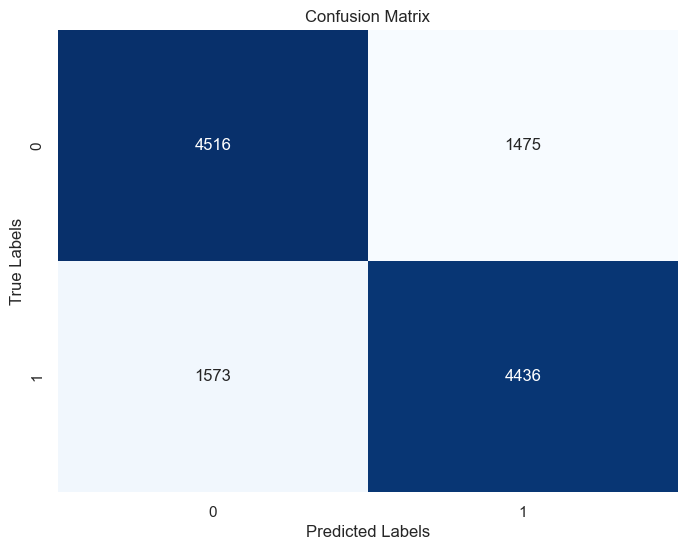

In [192]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()